In [70]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [71]:
%matplotlib inline

In [72]:
df=pd.read_csv('./USArrests.csv',index_col=0)

In [73]:
df.head(2)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [75]:
#mean of each column of data 
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [76]:
#check for variance of data
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [77]:
# df.drop('UrbanPop',axis=1,inplace=True)

It is important to standardize the variables to have mean zero and standard deviation 1 before performing PCA.We can do this using the scale()function from sklearn:

In [78]:
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(df),index=df.index,columns=df.columns)

In [79]:
X.head(2)

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424


Now we we will use the PCA() function from sklearn to compute the loading vectors

In [80]:
from sklearn.decomposition import PCA

In [81]:
X.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [84]:
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1','V2','V3','V4'])

In [85]:
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


In [86]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X),columns=['PC1','PC2','PC3','PC4'],index=X.index)

In [87]:
df_plot.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


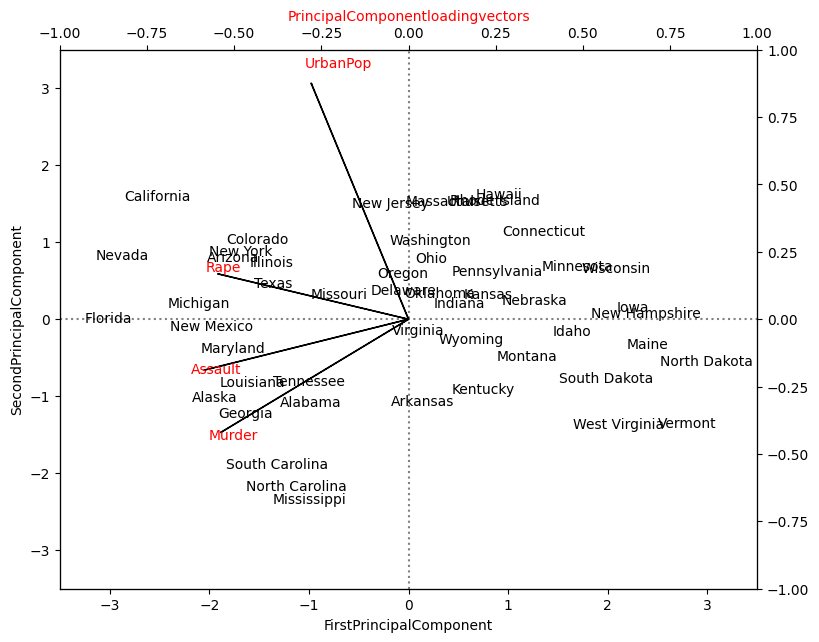

In [88]:
fig,ax1=plt.subplots(figsize=(9,7)) 
ax1.set_xlim(-3.5,3.5) 
ax1.set_ylim(-3.5,3.5) 
#PlotPrincipalComponents1and2 
for i in df_plot.index:
     ax1.annotate(i,(-df_plot.PC1.loc[i],-df_plot.PC2.loc[i]),ha='center') 
#Plotreferencelines 
ax1.hlines(0,-3.5,3.5,linestyles='dotted',colors='grey') 
ax1.vlines(0,-3.5,3.5,linestyles='dotted',colors='grey') 
ax1.set_xlabel('FirstPrincipalComponent') 
ax1.set_ylabel('SecondPrincipalComponent') 
#PlotPrincipalComponentloadingvectors,usingasecondy-axis. 
ax2=ax1.twinx().twiny() 
ax2.set_ylim(-1,1) 
ax2.set_xlim(-1,1) 
ax2.set_xlabel('PrincipalComponentloadingvectors',color='red') 
#Plotlabelsforvectors.Variable'a'isasmalloffsetparametertoseparatearrowtipandtext. 
a=1.07 
for i in pca_loadings[['V1','V2']].index: 
    ax2.annotate(i,(-pca_loadings.V1.loc[i]*a,-pca_loadings.V2.loc[i]*a),color='red') 
#Plotvectors 
ax2.arrow(0,0,-pca_loadings.V1[0],-pca_loadings.V2[0]) 
ax2.arrow(0,0,-pca_loadings.V1[1],-pca_loadings.V2[1]) 
ax2.arrow(0,0,-pca_loadings.V1[2],-pca_loadings.V2[2]) 
ax2.arrow(0,0,-pca_loadings.V1[3],-pca_loadings.V2[3])

In [89]:
#The PCA() function also outputs the variance explained by of each principal components , we can access these values as follows:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [90]:
# we can also get the proportion of variance:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [91]:
data_list = [pca.explained_variance_,pca.explained_variance_ratio_]

In [93]:
pd.DataFrame(data_list,index=['Standard Deviation','Proportion of variance'],columns=['PC1','PC2','PC3','PC4'])

,PC1,PC2,PC3,PC4
Standard Deviation,2.530859,1.009964,0.363840,0.176969
Proportion of variance,0.620060,0.247441,0.089141,0.043358


We can see that the first component explains 62.006% of the variance in the data, the next principle component explains 24.74% of variance , and so forth. We can plot the PVE explained by each component as follow: 

([<matplotlib.axis.XTick at 0x24f4b4be6b0>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

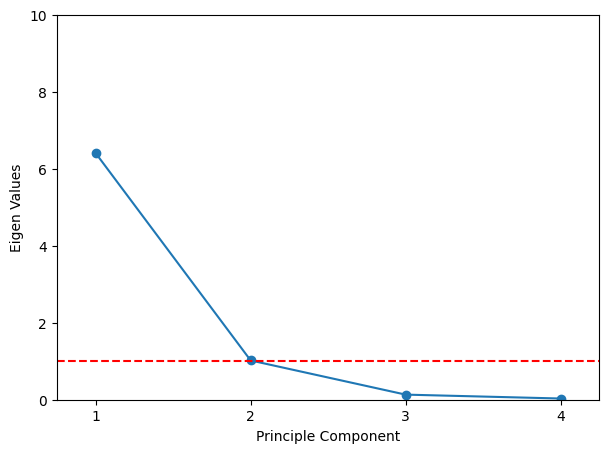

In [117]:
plt.figure(figsize=(7,5))
plt.plot(list(range(1,len(pca.explained_variance_)+1)), list(map(lambda x: x**2,pca.explained_variance_)), '-o')
plt.ylabel('Eigen Values')
plt.xlabel('Principle Component')
plt.xlim(0.75,4.25)
plt.ylim(0,10)
plt.axhline(y=1,color='red',linestyle='--')
plt.xticks([1,2,3,4])

The above is the scree plot. As per Kaiser’s rule, PC with Eigenvalue >= 1 (SD-square) must be used/retained for the latent variable.